# IT market analysis

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from collections import Counter

In [5]:
from matplotlib.pyplot import figure

In [6]:
df_questions = pd.read_csv('http://bit.ly/stackoverflow-questions-2018', encoding = "utf-8-sig")
df_answers = pd.read_csv('http://bit.ly/stackoverflow-results-2018', encoding = "utf-8-sig")

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Informacje o danych

In [7]:
df_answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


In [8]:
df_answers.dtypes[df_answers.dtypes == 'float64']

AssessJob1               float64
AssessJob2               float64
AssessJob3               float64
AssessJob4               float64
AssessJob5               float64
AssessJob6               float64
AssessJob7               float64
AssessJob8               float64
AssessJob9               float64
AssessJob10              float64
AssessBenefits1          float64
AssessBenefits2          float64
AssessBenefits3          float64
AssessBenefits4          float64
AssessBenefits5          float64
AssessBenefits6          float64
AssessBenefits7          float64
AssessBenefits8          float64
AssessBenefits9          float64
AssessBenefits10         float64
AssessBenefits11         float64
JobContactPriorities1    float64
JobContactPriorities2    float64
JobContactPriorities3    float64
JobContactPriorities4    float64
JobContactPriorities5    float64
JobEmailPriorities1      float64
JobEmailPriorities2      float64
JobEmailPriorities3      float64
JobEmailPriorities4      float64
JobEmailPr

In [9]:
df_answers.dtypes[df_answers.dtypes == 'object']

Hobby                          object
OpenSource                     object
Country                        object
Student                        object
Employment                     object
FormalEducation                object
UndergradMajor                 object
CompanySize                    object
DevType                        object
YearsCoding                    object
YearsCodingProf                object
JobSatisfaction                object
CareerSatisfaction             object
HopeFiveYears                  object
JobSearchStatus                object
LastNewJob                     object
UpdateCV                       object
Currency                       object
Salary                         object
SalaryType                     object
CurrencySymbol                 object
CommunicationTools             object
TimeFullyProductive            object
EducationTypes                 object
SelfTaughtTypes                object
TimeAfterBootcamp              object
HackathonRea

## Dane po ilości wystąpień

In [10]:
def checkAnswersForColumn(columnName, file):
    from collections import defaultdict
    dataDictionary = defaultdict(lambda: 0)
    for i in list(file[columnName][file[columnName].notnull()]):
        line = i.split(";")
        for j in line:
            dataDictionary[j] += 1
    
    d = {columnName: list(dataDictionary.keys()), 'Volume': list(dataDictionary.values())}
    df = pd.DataFrame(data=d)

    
    return df.sort_values('Volume', ascending = False).reset_index(level=-1, drop = True)

In [11]:
checkAnswersForColumn("IDE", df_answers)

,IDE,Volume
0,Visual Studio Code,26280
1,Visual Studio,25870
2,Notepad++,25755
3,Sublime Text,21810
4,Vim,19477
5,IntelliJ,18765
6,Android Studio,14558
7,Eclipse,14213
8,Atom,13576
9,PyCharm,9027


In [12]:
checkAnswersForColumn("PlatformWorkedWith", df_answers)

,PlatformWorkedWith,Volume
0,Linux,31859
1,Windows Desktop or Server,23393
2,Android,19157
3,AWS,15927
4,Mac OS,11822
5,Raspberry Pi,10509
6,WordPress,10486
7,iOS,10201
8,Firebase,9575
9,Azure,7267


In [13]:
checkAnswersForColumn("FrameworkWorkedWith", df_answers)

,FrameworkWorkedWith,Volume
0,Node.js,25598
1,Angular,19023
2,React,14337
3,.NET Core,14026
4,Spring,9079
5,Django,6723
6,Cordova,4369
7,TensorFlow,4026
8,Xamarin,3796
9,Spark,2475


In [14]:
checkAnswersForColumn("OperatingSystem", df_answers)

,OperatingSystem,Volume
0,Windows,38022
1,MacOS,20325
2,Linux-based,17684
3,BSD/Unix,148


In [15]:
checkAnswersForColumn("OpenSource", df_answers)

,OpenSource,Volume
0,No,55769
1,Yes,43086


In [16]:
checkAnswersForColumn("Student", df_answers)

,Student,Volume
0,No,70399
1,"Yes, full-time",18394
2,"Yes, part-time",6108


In [17]:
checkAnswersForColumn("Country", df_answers).head(10)

,Country,Volume
0,United States,20309
1,India,13721
2,Germany,6459
3,United Kingdom,6221
4,Canada,3393
5,Russian Federation,2869
6,France,2572
7,Brazil,2505
8,Poland,2122
9,Australia,2018


In [18]:
checkAnswersForColumn("FormalEducation", df_answers)

,FormalEducation,Volume
0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",43659
1,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",21396
2,Some college/university study without earning ...,11710
3,"Secondary school (e.g. American high school, G...",8951
4,Associate degree,2970
5,"Other doctoral degree (Ph.D, Ed.D., etc.)",2214
6,Primary/elementary school,1656
7,"Professional degree (JD, MD, etc.)",1447
8,I never completed any formal education,700


In [19]:
checkAnswersForColumn("JobSatisfaction", df_answers)

,JobSatisfaction,Volume
0,Moderately satisfied,26005
1,Extremely satisfied,12436
2,Slightly satisfied,10012
3,Slightly dissatisfied,7057
4,Moderately dissatisfied,6318
5,Neither satisfied nor dissatisfied,4966
6,Extremely dissatisfied,2482


In [20]:
checkAnswersForColumn("StackOverflowVisit", df_answers)

,StackOverflowVisit,Volume
0,Daily or almost daily,24964
1,Multiple times per day,23864
2,A few times per week,17179
3,A few times per month or weekly,8819
4,Less than once per month or monthly,1564
5,I have never visited Stack Overflow (before to...,421


In [21]:
checkAnswersForColumn("Age", df_answers)

,Age,Volume
0,25 - 34 years old,31759
1,18 - 24 years old,15249
2,35 - 44 years old,11477
3,45 - 54 years old,3313
4,Under 18 years old,1638
5,55 - 64 years old,959
6,65 years or older,179


## Średnia lat doświadczenia

In [22]:
def checkYears(yearsData):
    average = 0
    counter = 0
    for i in yearsData:
        for j in i.replace("-", " ").split(" "):
            if j.isdigit() == True:
                average += int(j)
                counter += 1
                
    if counter != 0:
        average /= counter
        
    return average

In [23]:
yearsCodingData = df_answers.YearsCoding[df_answers.YearsCoding.notnull()]
yearsProfCodingData = df_answers.YearsCodingProf[df_answers.YearsCodingProf.notnull()]

In [24]:
checkYears(yearsCodingData)

9.20311091317902

In [25]:
checkYears(yearsProfCodingData)


6.565603479521566

## Średnie zarobki

In [26]:
df_answers.ConvertedSalary.mean()

95780.86178776571

## Średnie zarobki uzależnione od wieku dla 10 krajów, które udzieliły najwięcej odpowiedzi

In [27]:
perCountry = df_answers[['Country', 'Age', 'ConvertedSalary']][np.logical_and
                        (df_answers["Age"].notnull(), df_answers["ConvertedSalary"].notnull())]

countryList = list(perCountry["Country"].value_counts().head(10).to_dict().keys())

perCountry = perCountry[perCountry["Country"].isin(countryList)]
for i in range(len(perCountry)):
    if perCountry["Age"].values[i] == "25 - 34 years old": 
        perCountry["Age"].values[i] = 30
        
    elif perCountry["Age"].values[i] == "35 - 44 years old": 
        perCountry["Age"].values[i] = 40
        
    elif perCountry["Age"].values[i] == "18 - 24 years old": 
        perCountry["Age"].values[i] = 21
    
    elif perCountry["Age"].values[i] == "Under 18 years old": 
        perCountry["Age"].values[i] = 16
    
    elif perCountry["Age"].values[i] == "45 - 54 years old": 
        perCountry["Age"].values[i] = 50
        
    elif perCountry["Age"].values[i] == "65 years or older": 
        perCountry["Age"].values[i] = 70
        
    elif perCountry["Age"].values[i] == "55 - 64 years old": 
        perCountry["Age"].values[i] = 60

ageValue = perCountry["Age"].values
perCountry["Age"] = pd.to_numeric(perCountry["Age"])
perCountry = perCountry.groupby(["Country", "Age"]).mean()
perCountry

ConvertedSalary
Country            Age                 
Australia          16      14106.300000
                   21     101635.056497
                   30     115867.522682
                   40     144277.140127
                   50     140422.867347
                   60     273023.285714
                   70     119960.000000
Brazil             16       2500.800000
                   21      36777.967105
                   30      57034.840502
                   40      73789.032051
                   50     119184.375000
                   60     131004.000000
Canada             16      60556.050000
                   21      84314.201201
                   30      95174.658562
                   40     111708.002294
                   50     126511.024793
                   60     139803.484848
                   70      68241.750000
France             16      15060.000000
                   21      50982.409524
                   30      88670.397078
                   40     126978.149123
                   50     128735.312500
                   60     166628.357143
                   70      12239.000000
Germany            16       4892.676471
                   21      45250.967742
                   30      91645.706554
...                                 ...
India              30      28766.059158
                   40      61454.656805
                   50     113685.230769
                   70       3150.000000
Netherlands        16       6774.571429
                   21      43469.183168
                   30      84742.959488
                   40     115401.087179
                   50      95634.176471
                   60     127951.409091
Russian Federation 16      11890.294118
                   21      15038.879725
                   30      27963.269795
                   40      33590.387597
                   50     106558.785714
                   60      40149.000000
United Kingdom     16      31664.900000
                   21      87438.910714
                   30     122987.218821
                   40     159970.083138
                   50     173812.979167
                   60     174278.833333
                   70      58513.500000
United States      16      31117.177778
                   21     125874.454689
                   30     152934.767374
                   40     162993.784863
                   50     173545.390716
                   60     209511.514469
                   70     160852.941176

[66 rows x 1 columns]

<Figure size 14400x7200 with 0 Axes>

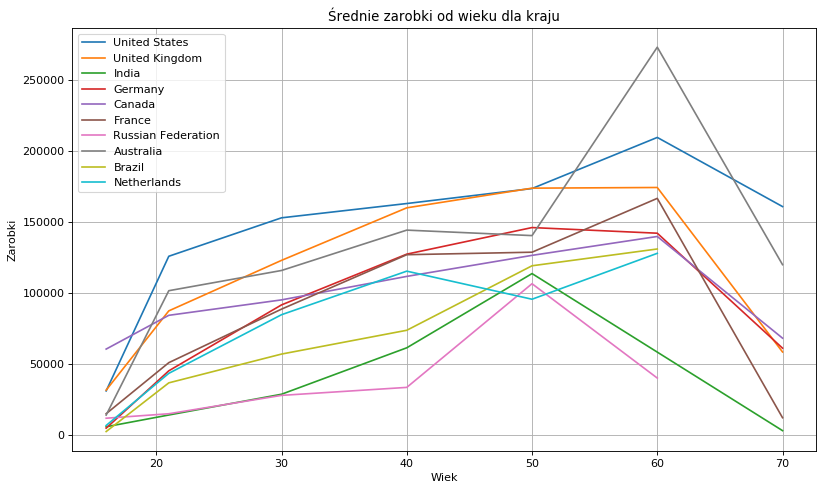

<Figure size 14400x7200 with 0 Axes>

In [28]:
figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ageList = []
for i in countryList:
    ageAndMoney = []
    ages = []
    for j in [16, 21, 30, 40, 50, 60, 70]:
        try:
            ageAndMoney.append(perCountry.loc[i].loc[j].ConvertedSalary)
            ages.append(j)
        except:
            pass
    ageList.append(ages)
    ageList.append(ageAndMoney) 
for i in range(len(countryList)):
    plt.plot(ageList[2*i], ageList[2*i + 1], label = countryList[i])
plt.title("Średnie zarobki od wieku dla kraju")
plt.ylabel("Zarobki")
plt.xlabel("Wiek")
plt.legend()
plt.grid(True)
plt.figure(figsize=(200,100))
